# LinkedIn Agent

## Identifying Jobs from Linkedin that align with the required job by the user and list the jobs in a csv file

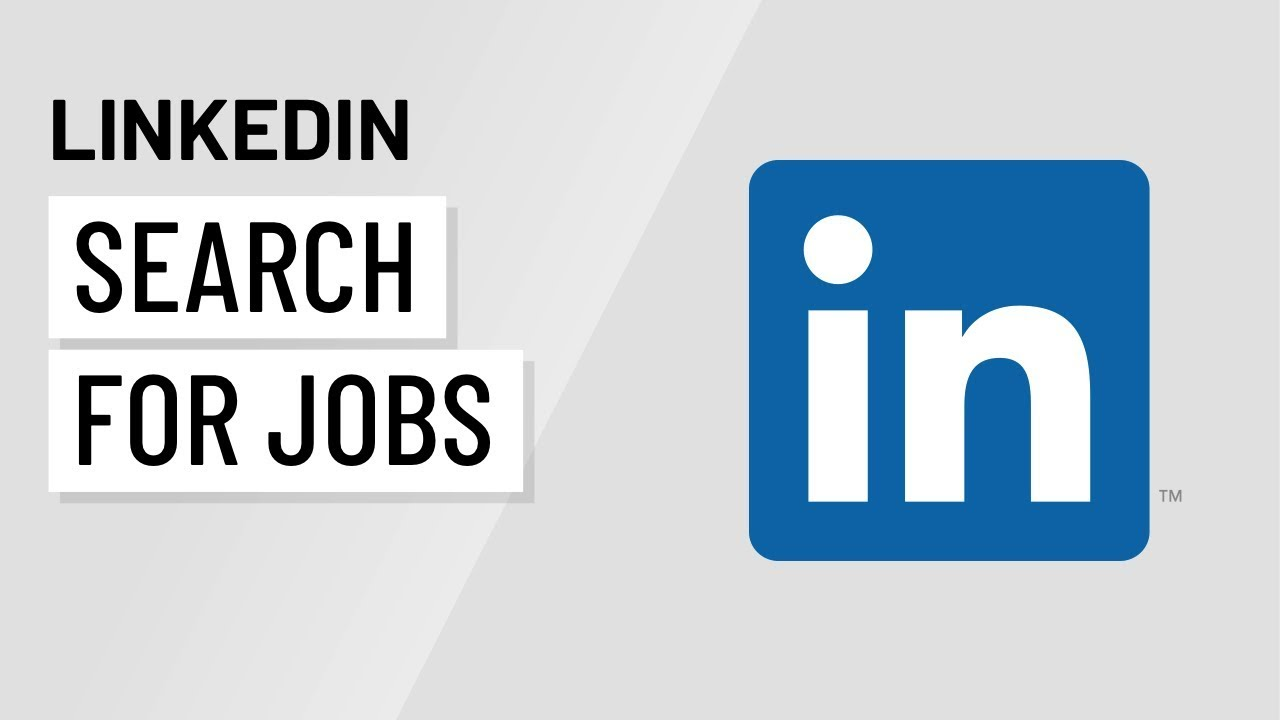

#**Selenium:**
### Selenium is a widely-used open-source tool for automating web browsers. It provides a suite of tools for different purposes, primarily used for testing web applications.
###**Selenium WebDriver:**

**Function**: Automates web browser interaction by sending commands to the browser and retrieving results.

**Features:** Supports multiple browsers (Chrome, Firefox, Safari, Edge, etc.), and can be used with various programming languages (Java, Python, C#, Ruby, JavaScript, etc.).

**Usage:** Used for creating robust, browser-based regression automation suites and tests.

In [26]:
!pip install selenium


In [27]:
pip install numpy


In [28]:
!pip install -qq langchain==0.1.2
!pip install -qq langchain_experimental==0.0.49
!pip install -qq langchain-openai==0.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.6/803.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [29]:
pip install  openai


In [30]:
pip install python-dotenv


## Installing Chromium Driver


### if you are on a local machine refer to the tutorial below to install chrome driver

[Download chrome driver in local machine ](https://www.youtube.com/watch?v=kswxXe0U1NA)

In [31]:
!apt-get update
!apt-get install chromium chromium-driver

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

## Importing Necessary Libraries

In [32]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException

import csv
from google.colab import files

In [33]:
import os
import pandas as pd
from getpass import getpass
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAI
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

## Set Up

In [34]:
import openai
from getpass import getpass

os.environ["OPENAI_API_KEY"] = getpass("OpenAI API Key: ")
#openai.api_key = os.getenv("OPENAI_API_KEY")
openai.api_key = os.environ.get("OPENAI_API_KEY")

OpenAI API Key: ··········


In [35]:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

## Testing The Driver

In [36]:
driver = web_driver()

driver.get('https://www.google.com')
print(driver.title)

driver.quit()

Google


## Input

In [37]:
skills = input("Enter the skills you have: ")
loc = input("Enter your preferred job location: ")


Enter the skills you have: html,css,javascript
Enter your preferred job location: pune


In [38]:
from openai import OpenAI

client = OpenAI(
  #api_key= api_key, # this is also the default, it can be omitted
)


In [39]:
def answer_prompt(prompt, context=None, sys_msg=None):
    messages = []
    if sys_msg:
        messages.append( {"role": "system", "content": sys_msg})
    if context:
        messages.append({"role": "user", "content": context})

    messages = [{"role": "user", "content": prompt}]
    completion = client.chat.completions.create(
                                                model="gpt-3.5-turbo",
                                                messages=messages
                                                )
    return completion.choices[0].message.content

In [40]:
roles= []

## Function to generate relevant roles by skills

In [41]:
def create_search_query(skills):
    query = answer_prompt(f" find relevant job roles for a person with the following skills and return them in the form of a python list: {skills}")
    return query

## Defining Functions
### - The available_jobs() functions gives the no. of available jobs according to your input and it also gives the url to navigate
### - The get_jobs() function sets the driver to the current url.
### - The list_jobs() function lists out the jobs in order.
### - The jobs_csv_file() functions creates a csv file with job title adress and the link to job profile.

In [42]:
def available_jobs(prof,loc):
  driver = web_driver()
  driver.get(f'https://www.linkedin.com/jobs/search?keywords={prof}&location={loc}&geoId=&trk=homepage-jobseeker_jobs-search-bar_search-submit&redirect=false&position=1&pageNum=0')
  print(driver.title)
  current_url = driver.current_url
  print(f"Current URL: {current_url}")


In [43]:
def get_jobs(prof,loc):
  driver = web_driver()
  driver.get(f'https://www.linkedin.com/jobs/search?keywords={prof}&location={loc}&geoId=&trk=homepage-jobseeker_jobs-search-bar_search-submit&redirect=false&position=1&pageNum=0')
  current_url = driver.current_url
  print(f"Current URL: {current_url}")
  return driver


In [44]:
def list_jobs(driver):
  job_list = driver.find_elements(By.XPATH,'//*[@id="main-content"]/section[2]/ul/li')
  for listing in job_list:
    try:
        j_e = listing.find_element(By.CLASS_NAME, 'sr-only')
        j_t = j_e.text
        print("Job_Title:", j_t)

        o_n = listing.find_element(By.CLASS_NAME, 'base-search-card__subtitle')
        org_name = o_n.text
        print("Organisation Name :",org_name)



        a_e = listing.find_element(By.CLASS_NAME, 'job-search-card__location')
        address = a_e.text

        job_link_element = listing.find_element(By.TAG_NAME, 'a')
        job_link = job_link_element.get_attribute('href')

        print("Address:",address)



        # l_e = listing.find_element(By.CLASS_NAME,'base-card__full-link absolute top-0 right-0 bottom-0 left-0 p-0 z-[2]')
        # job_link = l_e.get_attribute('href')
        job_link_element = listing.find_element(By.TAG_NAME, 'a')
        job_link = job_link_element.get_attribute('href')

        print("job link:",job_link)
        print("-"*50)

    except NoSuchElementException:
        print("element not found for a listing. Skipping.")


## To Know the No.of Front-end Developer Jobs Available In Mumbai

In [45]:
available_jobs("front-end developer","mumbai,india")


Current URL: https://www.linkedin.com/jobs/search?keywords=front-end%20developer&location=mumbai,india&geoId=&trk=homepage-jobseeker_jobs-search-bar_search-submit&redirect=false&position=1&pageNum=0


## To Know the No.of Teacher Jobs Available In Hyderabad

In [46]:
available_jobs("teacher","hyderabad,india")


Current URL: https://www.linkedin.com/jobs/search?keywords=teacher&location=hyderabad,india&geoId=&trk=homepage-jobseeker_jobs-search-bar_search-submit&redirect=false&position=1&pageNum=0


## To list the Jobs Available In Hyderabad for Python-developer


In [47]:
driver = get_jobs("python_developer", "chennai, india")
list_jobs(driver)

Current URL: https://www.linkedin.com/jobs/search?keywords=python_developer&location=chennai,%20india&geoId=&trk=homepage-jobseeker_jobs-search-bar_search-submit&redirect=false&position=1&pageNum=0


## To Create CSV File for available Teacher Jobs In Delhi

In [48]:
available_jobs("teacher","hyderabad,india")

203 Teacher jobs in Hyderabad
Current URL: https://www.linkedin.com/jobs/search?keywords=teacher&location=hyderabad%2Cindia&geoId=&trk=homepage-jobseeker_jobs-search-bar_search-submit&redirect=false&position=1&pageNum=0


In [49]:

driver = get_jobs("teacher", "chennai, india")
list_jobs(driver)

Current URL: https://www.linkedin.com/jobs/search?keywords=teacher&location=chennai,%20india&geoId=&trk=homepage-jobseeker_jobs-search-bar_search-submit&redirect=false&position=1&pageNum=0


In [50]:
job_data = []
def jobs_csv_file(job, loc):

    driver = web_driver()
    driver.get(f'https://www.linkedin.com/jobs/search?keywords={job}&location={loc}&geoId=&trk=homepage-jobseeker_jobs-search-bar_search-submit&redirect=false&position=1&pageNum=0')
    print(driver.title)

    job_list = driver.find_elements(By.XPATH, '//*[@id="main-content"]/section[2]/ul/li')

    for listing in job_list:
        try:
            j_e = listing.find_element(By.CLASS_NAME, 'sr-only')
            j_t = j_e.text

            a_e = listing.find_element(By.CLASS_NAME, 'job-search-card__location')
            address = a_e.text

            job_link_element = listing.find_element(By.TAG_NAME, 'a')
            job_link = job_link_element.get_attribute('href')

            o_n = listing.find_element(By.CLASS_NAME, 'base-search-card__subtitle')
            org_name = o_n.text

            # Create a dictionary for this job listing
            job_dict = {
                'Job Title': j_t,
                'Organization Name': org_name,
                'Address': address,
                'Job Link': job_link
            }

            # Append the job data dictionary to the list
            job_data.append(job_dict)



        except NoSuchElementException:
            print("Element not found for a listing. Skipping.")
    driver.quit()


In [52]:
def get_jobs_by_skills(skills,loc):
  roles = create_search_query(skills)
  split_roles = roles.strip("[]").split(", ")

# Initialize a new list to store words separated by commas
  new_list = []

# TO  Iterate through each word in the split_roles list
  for role in split_roles:
    #  To Split each role by space to get individual words
      words = role.split(", ")
    #  To Extend the new_list with the words
      new_list.extend(words)

# Remove extra quotation marks from each word
  cleaned_list = [word.strip("'") for word in new_list]

# Printing the cleaned list
  print(cleaned_list)
  print("The roles you can apply to are :")
  titles = cleaned_list
  for title in titles:
      print(title)
  job_data = []
  for title in titles:
      jobs_csv_file(title,"Pune")



# Searching for job By providing relevant skills

In [53]:
skills = input("Enter the skills you have: ")
loc = input("Enter your preferred job location: ")

Enter the skills you have: html,css,javascript
Enter your preferred job location: pune,india


In [54]:
get_jobs_by_skills(skills,loc)

['Front End Developer', 'Web Designer', 'UI Developer', 'Full Stack Developer', 'Web Developer', 'Software Engineer']
The roles you can apply to are :
Front End Developer
Web Designer
UI Developer
Full Stack Developer
Web Developer
Software Engineer
822 Front End Developer jobs in Pune

10,000+ UI Developer jobs in Pune
1,000+ Full Stack Developer jobs in Pune

11,000+ Software Engineer jobs in Pune


In [57]:
print(job_data[5])

{'Job Title': 'Frontend Developer', 'Organization Name': 'Startupwala', 'Address': 'Pune, Maharashtra, India', 'Job Link': 'https://in.linkedin.com/jobs/view/frontend-developer-at-startupwala-3656597318?position=6&pageNum=0&refId=KkefcMB%2BCKUz4vjyDz3uMQ%3D%3D&trackingId=%2Bhxx8rz%2BFSZ9AgSZm0hdog%3D%3D&trk=public_jobs_jserp-result_search-card'}


In [58]:
csv_file_path = "job_listings.csv"

# Define the fieldnames for the CSV file
fieldnames = ['Job Title', 'Address', 'Job Link', 'Organization Name']

# Write the job data to the CSV file
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(job_data)

print(f"CSV file '{csv_file_path}' has been created successfully.")

CSV file 'job_listings.csv' has been created successfully.


In [59]:
df = pd.read_csv("job_listings.csv")

In [60]:
df.head()

,Job Title,Address,Job Link,Organization Name
0,Frontend Developer - Javascript,"Pune, Maharashtra, India",https://in.linkedin.com/jobs/view/frontend-dev...,Visionyle Solutions
1,Frontend Developer,"Pune, Maharashtra, India",https://in.linkedin.com/jobs/view/frontend-dev...,1Tap
2,Frontend Developer,"Pune, Maharashtra, India",https://in.linkedin.com/jobs/view/frontend-dev...,BrandzGarage
3,Frontend Developer,"Pune, Maharashtra, India",https://in.linkedin.com/jobs/view/frontend-dev...,Debtors Watch LLP
4,Frontend Developer,"Pune, Maharashtra, India",https://in.linkedin.com/jobs/view/frontend-dev...,Connexdoor


In [61]:
print(job_data[5])

{'Job Title': 'Frontend Developer', 'Organization Name': 'Startupwala', 'Address': 'Pune, Maharashtra, India', 'Job Link': 'https://in.linkedin.com/jobs/view/frontend-developer-at-startupwala-3656597318?position=6&pageNum=0&refId=KkefcMB%2BCKUz4vjyDz3uMQ%3D%3D&trackingId=%2Bhxx8rz%2BFSZ9AgSZm0hdog%3D%3D&trk=public_jobs_jserp-result_search-card'}
